<a href="https://colab.research.google.com/github/7atemAlawwad/T5/blob/main/ask_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [135]:
#!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
#!unzip bus-breakdown-and-delays.zip

## Importing Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [137]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [139]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [140]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [141]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


Distribution of features

Categorical feature analysis

Correlation matrix

Outlier detection

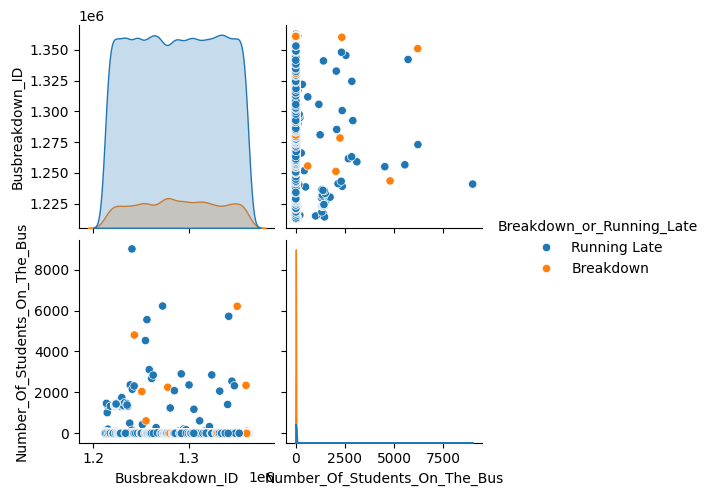

In [142]:
sns.pairplot(df, hue='Breakdown_or_Running_Late')
plt.show()

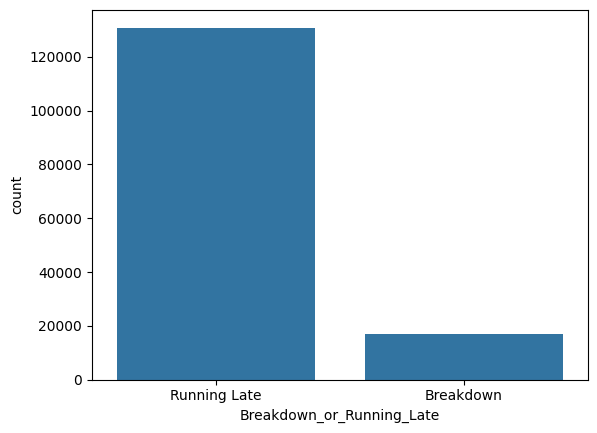

In [143]:
sns.countplot(x='Breakdown_or_Running_Late', data=df)
plt.show()

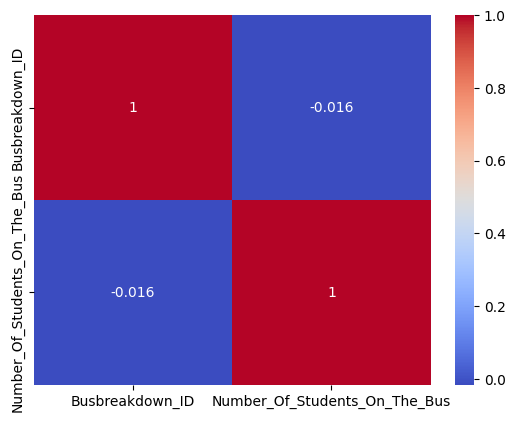

In [144]:
num_cols = df.select_dtypes(include=np.number).columns

corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

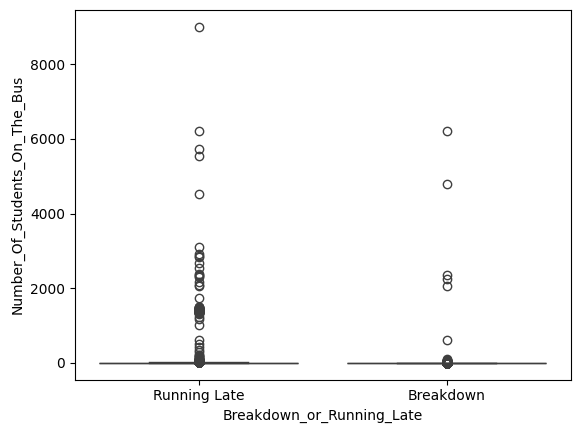

In [145]:
sns.boxplot(x='Breakdown_or_Running_Late', y='Number_Of_Students_On_The_Bus', data=df)
plt.show()

In [146]:
num_cols

Index(['Busbreakdown_ID', 'Number_Of_Students_On_The_Bus'], dtype='object')

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [147]:
df.drop('Incident_Number', axis=1, inplace=True)

In [148]:
df.dropna(inplace=True)

In [149]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120553 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   School_Year                      120553 non-null  category
 1   Busbreakdown_ID                  120553 non-null  int64   
 2   Run_Type                         120553 non-null  category
 3   Bus_No                           120553 non-null  category
 4   Route_Number                     120553 non-null  category
 5   Reason                           120553 non-null  category
 6   Schools_Serviced                 120553 non-null  category
 7   Occurred_On                      120553 non-null  category
 8   Created_On                       120553 non-null  category
 9   Boro                             120553 non-null  category
 10  Bus_Company_Name                 120553 non-null  category
 11  How_Long_Delayed                 120553 non-null  categor

In [151]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


#Label encoding


for col in df.select_dtypes(include=['category']).columns:
    df[col] = le.fit_transform(df[col])

print(df.head())



   School_Year  Busbreakdown_ID  Run_Type  Bus_No  Route_Number  Reason  \
0            0          1224901         3    6920            73       6   
1            0          1225098         3    7507            73       3   
2            0          1215800         3    4314           196       3   
3            0          1215511         3    4219           196       6   
4            0          1215828         3    4225           196       6   

   Schools_Serviced  Occurred_On  Created_On  Boro  Bus_Company_Name  \
0              4452        48550       52137     1                26   
1              4515        48811       52408     1                26   
2              4420        41505       44402     1                26   
3              4419        41394       44267     1                26   
4              4587        41508       44409     1                26   

   How_Long_Delayed  Number_Of_Students_On_The_Bus  \
0               187                              5   
1       

In [152]:
#Handle Outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]

In [153]:
df.duplicated().sum()

0

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [157]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [160]:
summary = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
4819/4819 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9771 - loss: 0.0710 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 2/10
4819/4819 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9999 - val_loss: 2.4174e-04
Epoch 3/10
4819/4819 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9998 - loss: 9.4765e-04 - val_accuracy: 0.9999 - val_loss: 5.4223e-04
Epoch 4/10
4819/4819 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9998 - loss: 8.5130e-04 - val_accuracy: 1.0000 - val_loss: 7.0356e-05
Epoch 5/10
4819/4819 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9999 - loss: 3.9235e-04 - val_accuracy: 0.9999 - val_loss: 2.1339e-04
Epoch 6/10
4819/4819 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9999 - loss: 4.6618e-04 - val_accuracy: 0.9999 - val_loss: 3.9712e-04
Epoch 7/10
4819/4819 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9999 - loss: 2.9509e-04 - val_accuracy: 0.9999 - val_loss: 2.0557e-04
Epoch 8/10
4819/4819 ━━━━━━━━━━━━━━━━━━

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [161]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



1506/1506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 0.0012
Test accuracy: 0.9999377727508545


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [163]:
y_val_pred = model.predict(X_test)
y_val_pred = (y_val_pred > 0.5).astype(int)


1506/1506 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

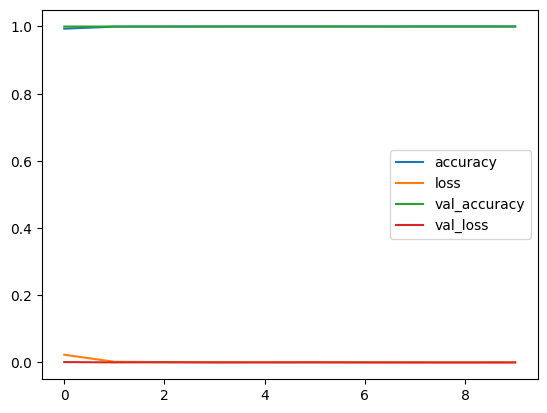

In [166]:
np.argmax(y_val_pred, axis = 1)



pd.DataFrame(summary.history).plot()
plt.show()

## Save the Model
Save the trained model for submission.

In [167]:
model.save('hatem.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

**Data Preprocessing:**

Applied normalization (Z-score), label encoding, and SMOTE for class balance to prepare data for effective model training.

**Model Architecture:**

Designed with two hidden layers (64 and 32 neurons) using ReLU activation, and a dropout layer to prevent overfitting. Sigmoid activation was used for the binary output.

**Training Process:**

Used a batch size of 32 and 10 epochs with the Adam optimizer, balancing stability, and efficiency.
Loss Function and Metrics:

Binary cross-entropy was chosen for loss, with accuracy as the evaluation metric, aligning with the binary classification goal.

**Regularization:**

Implemented dropout to improve model generalization by reducing overfitting.

**Model Evaluation:**

Focused on accuracy and loss to assess model performance in classifying incidents.

**Model Tuning:**

Adjusted hyperparameters like neurons and learning rate to enhance accuracy and reduce overfitting.

**Overfitting and Underfitting:**

Detected slight overfitting, with dropout and other strategies considered to mitigate it.